In [317]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing

import xgboost as xgb
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

In [318]:
dados = pd.read_csv("dados_pre_processados.csv")
dados.drop("Unnamed: 0", axis = "columns", inplace=True)
dados.head()

CodigoReceita TipoLancamento    DataEmissaoNotaFiscal  CodigoCliente  \
0         672051              B  2015-01-16 07:35:31.770        6248051   
1         672051              B  2015-01-16 08:20:03.153        6248051   
2         672051              B  2015-01-16 10:05:20.293        6248051   
3         672051              B  2015-01-20 18:52:57.373       12343051   
4         672051              B  2015-01-21 07:08:54.847        6248051   

   CodigoMotorista TempoPermanenciaObra  Idade TipoTraco  CodigoAglomerante  \
0            11080             02:41:00     28         N            12051.0   
1            87079             02:46:00     28         N            12051.0   
2            43080             01:32:00     28         N            12051.0   
3            43080             01:10:00     28         N            12051.0   
4            42080             00:35:00     28         N            12051.0   

    FCK  Rompimento7Dias  Rompimento28Dias  UsaCimentoPuro  \
0  30.0            20.83             31.81               0   
1  30.0            19.62             31.21               0   
2  30.0            21.97             36.68               0   
3  30.0            28.21             40.21               0   
4  30.0            25.80             38.74               0   

   ResultadoProjetado  PercentualCrescimentoReal  \
0           33.321754                  52.712434   
1           31.799067                  59.072375   
2           34.733698                  66.954939   
3           42.118539                  42.538107   
4           39.330637                  50.155039   

   PercentualCrescimentoProjetado  RelacaoAguaCimento  
0                       59.970014            0.535294  
1                       62.074756            0.535294  
2                       58.096029            0.535294  
3                       49.303577            0.535294  
4                       52.444329            0.535294

In [322]:
dados_por_aglomerante = dados.groupby("CodigoAglomerante")
dados_por_aglomerante.groups

{3051.0: [798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 1430, 1431, 1432, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, ...], 4051.0: [792, 793, 794, 795, 796, 797, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1802, 1803, 1804, 1805, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,

In [323]:
da = dados_por_aglomerante.get_group(120051.0)
da.head()

CodigoReceita TipoLancamento    DataEmissaoNotaFiscal  CodigoCliente  \
55736       48806051              C  2020-04-07 09:32:55.733      238446998   
55737       48806051              C  2020-05-26 09:31:08.413      110802998   
55738       48806051              C  2020-05-27 09:58:12.913      111006998   
55739       48806051              C  2020-05-27 10:46:10.427      111006998   
55740       48806051              C  2020-05-27 12:58:32.780      111006998   

       CodigoMotorista TempoPermanenciaObra  Idade TipoTraco  \
55736           873051             01:40:00     28         N   
55737            21060             01:10:00     28         N   
55738           873051             00:20:00     28         N   
55739            21060             00:23:00     28         N   
55740           890051             00:50:00     28         N   

       CodigoAglomerante   FCK  Rompimento7Dias  Rompimento28Dias  \
55736           120051.0  30.0            32.42             41.78   
55737           120051.0  30.0            26.91             36.59   
55738           120051.0  30.0            28.94             42.65   
55739           120051.0  30.0            30.08             43.27   
55740           120051.0  30.0            27.08             35.59   

       UsaCimentoPuro  ResultadoProjetado  PercentualCrescimentoReal  \
55736               1           42.893292                  28.871067   
55737               1           33.928283                  35.971758   
55738               1           36.227997                  47.373877   
55739               1           37.511674                  43.849734   
55740               1           34.121576                  31.425406   

       PercentualCrescimentoProjetado  RelacaoAguaCimento  
55736                       32.305033            0.539007  
55737                       26.080575            0.527397  
55738                       25.183127            0.517123  
55739                       24.706361            0.517123  
55740                       26.002864            0.517123

In [324]:
fig = px.box(da, x="TipoLancamento", y="PercentualCrescimentoReal", title='Tipo de Lançamento x Percentual Crescimento')
fig.show()

In [325]:
fig = px.box(da, x="TipoTraco", y="PercentualCrescimentoReal", title='Tipo de Traço x Percentual Crescimento')
fig.show()

In [326]:
fig = px.box(da, x="FCK", y="PercentualCrescimentoReal", title='FCK x Percentual Crescimento')
fig.show()

In [327]:
fig = px.scatter(da, x="Rompimento7Dias", y="PercentualCrescimentoReal", title='Rompimento 7 Dias x Percentual Crescimento')
fig.show()

In [328]:
fig = px.scatter(da, x="RelacaoAguaCimento", y="PercentualCrescimentoReal", title='Relação Água Cimento x Percentual Crescimento')
fig.show()

In [329]:
fig = px.scatter(da, x="TempoPermanenciaObra", y="PercentualCrescimentoReal", title='Tempo Permanência Obra x Percentual Crescimento')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

<AxesSubplot:>

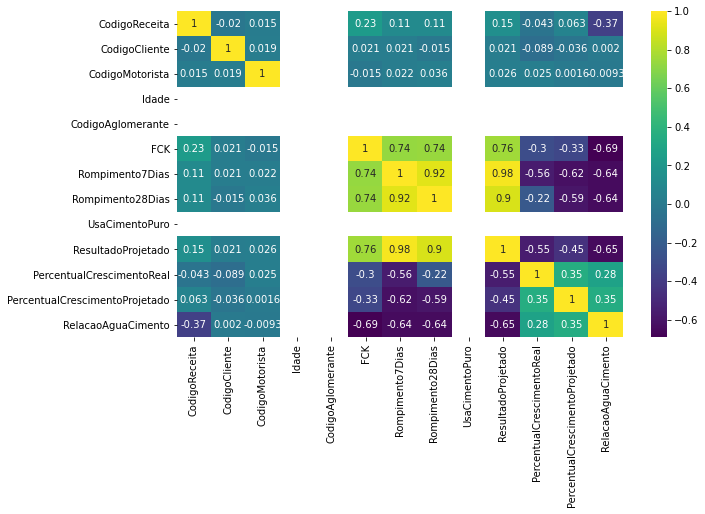

In [330]:
features_numericas = da.select_dtypes(include=['int', 'float'])

k = features_numericas.shape[1] #number of variables for heatmap
cols = da.corr().index
cm = da[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [331]:
da.head()

CodigoReceita TipoLancamento    DataEmissaoNotaFiscal  CodigoCliente  \
55736       48806051              C  2020-04-07 09:32:55.733      238446998   
55737       48806051              C  2020-05-26 09:31:08.413      110802998   
55738       48806051              C  2020-05-27 09:58:12.913      111006998   
55739       48806051              C  2020-05-27 10:46:10.427      111006998   
55740       48806051              C  2020-05-27 12:58:32.780      111006998   

       CodigoMotorista TempoPermanenciaObra  Idade TipoTraco  \
55736           873051             01:40:00     28         N   
55737            21060             01:10:00     28         N   
55738           873051             00:20:00     28         N   
55739            21060             00:23:00     28         N   
55740           890051             00:50:00     28         N   

       CodigoAglomerante   FCK  Rompimento7Dias  Rompimento28Dias  \
55736           120051.0  30.0            32.42             41.78   
55737           120051.0  30.0            26.91             36.59   
55738           120051.0  30.0            28.94             42.65   
55739           120051.0  30.0            30.08             43.27   
55740           120051.0  30.0            27.08             35.59   

       UsaCimentoPuro  ResultadoProjetado  PercentualCrescimentoReal  \
55736               1           42.893292                  28.871067   
55737               1           33.928283                  35.971758   
55738               1           36.227997                  47.373877   
55739               1           37.511674                  43.849734   
55740               1           34.121576                  31.425406   

       PercentualCrescimentoProjetado  RelacaoAguaCimento  
55736                       32.305033            0.539007  
55737                       26.080575            0.527397  
55738                       25.183127            0.517123  
55739                       24.706361            0.517123  
55740                       26.002864            0.517123

In [332]:
fig = px.box(da, x="TempoPermanenciaObra", title='FCK x Percentual Crescimento')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [333]:
def ClassificarTempoPermanenciaObra(item):
    if (item["TempoPermanenciaObra"] <= '00:30:00'):
        return 1
    elif (item["TempoPermanenciaObra"] <= '01:00:00'):
        return 2
    elif (item["TempoPermanenciaObra"] <= '01:30:00'):
        return 3
    elif (item["TempoPermanenciaObra"] <= '02:00:00'):
        return 4
    else:
        return 5

In [334]:
da["ClassificacaoTempoPermanenciaObra"] = da.apply(ClassificarTempoPermanenciaObra, axis = "columns")

<ipython-input-334-2fe19e153390>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [335]:
dados_finais = da[["CodigoReceita", "TipoLancamento", "CodigoCliente", "CodigoMotorista", "ClassificacaoTempoPermanenciaObra", "TipoTraco", "FCK", "RelacaoAguaCimento", "Rompimento7Dias", "PercentualCrescimentoReal"]]

In [336]:
dados_finais["TipoLancamento"].replace('C', 0, inplace = True)
dados_finais["TipoLancamento"].replace('B', 1, inplace = True)

dados_finais["TipoTraco"].replace('N', 0, inplace = True)
dados_finais["TipoTraco"].replace('E', 1, inplace = True)

/home/marina/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [337]:
dados_finais.columns = ['CodigoReceita', 'EhLancamentoBombeavel', 'CodigoCliente', 'CodigoMotorista',
       'ClassificacaoTempoPermanenciaObra', 'EhTracoEspecial', 'FCK', 'RelacaoAguaCimento',
       'Rompimento7Dias', 'PercentualCrescimentoReal']

In [338]:
dados_finais.head()

CodigoReceita  EhLancamentoBombeavel  CodigoCliente  CodigoMotorista  \
55736       48806051                      0      238446998           873051   
55737       48806051                      0      110802998            21060   
55738       48806051                      0      111006998           873051   
55739       48806051                      0      111006998            21060   
55740       48806051                      0      111006998           890051   

       ClassificacaoTempoPermanenciaObra  EhTracoEspecial   FCK  \
55736                                  4                0  30.0   
55737                                  3                0  30.0   
55738                                  1                0  30.0   
55739                                  1                0  30.0   
55740                                  2                0  30.0   

       RelacaoAguaCimento  Rompimento7Dias  PercentualCrescimentoReal  
55736            0.539007            32.42                  28.871067  
55737            0.527397            26.91                  35.971758  
55738            0.517123            28.94                  47.373877  
55739            0.517123            30.08                  43.849734  
55740            0.517123            27.08                  31.425406

In [339]:
dados_finais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 55736 to 62853
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CodigoReceita                      706 non-null    int64  
 1   EhLancamentoBombeavel              706 non-null    int64  
 2   CodigoCliente                      706 non-null    int64  
 3   CodigoMotorista                    706 non-null    int64  
 4   ClassificacaoTempoPermanenciaObra  706 non-null    int64  
 5   EhTracoEspecial                    706 non-null    int64  
 6   FCK                                706 non-null    float64
 7   RelacaoAguaCimento                 706 non-null    float64
 8   Rompimento7Dias                    706 non-null    float64
 9   PercentualCrescimentoReal          706 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 60.7 KB


In [340]:
class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype
    def fit(self, X, y=None):
        return self
    def transform(self, X):        
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])
    
class Debug(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype
    def fit(self, X, y=None):
        return self
    def transform(self, X):        
        print(X)

modelo = Pipeline([
  ('features', FeatureUnion(
      transformer_list=[
          ('numericals', Pipeline([
              ('selector', TypeSelector(np.number)),
              ('scaler', MinMaxScaler())
          ]))
      ]
  )),
  ('model', LinearRegression())
])

In [341]:
X = dados_finais.drop("PercentualCrescimentoReal", axis=1)
Y = dados_finais["PercentualCrescimentoReal"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 123)
modelo.fit(x_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numericals',
                                                 Pipeline(steps=[('selector',
                                                                  TypeSelector(dtype=<class 'numpy.number'>)),
                                                                 ('scaler',
                                                                  MinMaxScaler())]))])),
                ('model', LinearRegression())])

In [342]:
y_pred = modelo.predict(x_test)

In [343]:
dados_teste = da.loc[y_test.index]
y_proj = dados_teste["PercentualCrescimentoProjetado"]

In [344]:
j = 0

resultado_final = []

for i in y_test.index:
    diff_real_proj = (y_test[i] - y_proj[i])/y_test[i]
    diff_real_pred = (y_test[i] - y_pred[j])/y_test[i]
    
    if (diff_real_proj <= diff_real_pred):
        resultado_final.append('ModeloAntigo')
    else:
        resultado_final.append('ModeloNovo')
        
    j = j + 1

In [345]:
resultado_final.count('ModeloNovo')

58

In [346]:
resultado_final.count('ModeloAntigo')

154

In [347]:
modelo_arvore = Pipeline([
  ('features', FeatureUnion(
      transformer_list=[
          ('numericals', Pipeline([
              ('selector', TypeSelector(np.number)),
              ('scaler', MinMaxScaler())
          ]))
      ]
  )),
  ('model', GradientBoostingRegressor())
])

In [348]:
modelo_arvore.fit(x_train, y_train)
y_pred = modelo_arvore.predict(x_test)

In [349]:
j = 0

resultado_final_arvore = []

for i in y_test.index:
    diff_real_proj = (y_test[i] - y_proj[i])/y_test[i]
    diff_real_pred = (y_test[i] - y_pred_arvore[j])/y_test[i]
    
    if (diff_real_proj <= diff_real_pred):
        resultado_final_arvore.append('ModeloAntigo')
    else:
        resultado_final_arvore.append('ModeloNovo')
        
    j = j + 1

In [350]:
resultado_final_arvore.count('ModeloNovo')

184

In [351]:
resultado_final_arvore.count('ModeloAntigo')

28